In [175]:
%load_ext autoreload
%autoreload 2

import jax
jax.config.update("jax_enable_x64", True)

import jax.numpy as np
import pyforfluids as pff
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "IBM Plex Serif"
})
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (7, 6)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

import pandas as pd
import chemicals
float64 = "float64"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
methane_isot = pd.read_csv("methaneiso.csv")

In [9]:
t = 170.0

methane =    chemicals.CAS_from_any("methane")
methane_tc = np.array([chemicals.critical.Tc(methane)])
methane_pc = np.array([chemicals.critical.Pc(methane)])/1e5
methane_w =  np.array([chemicals.acentric.omega(methane)])

kij = [
    [0.0],
    [0.0]
]
lij = kij
z = np.array([1.0])

methane_mixrule = pff.models.mixingrules.ClassicVdW(kij, lij)
methane_armodel = pff.models.cubic.PR76(
    methane_tc, methane_pc, methane_w, methane_mixrule
)
methane = pff.models.system.System(armodel=methane_armodel)

vs = methane_isot["v"].values
ps = np.array([methane.pressure(z, vi, t) for vi in vs[::100]])

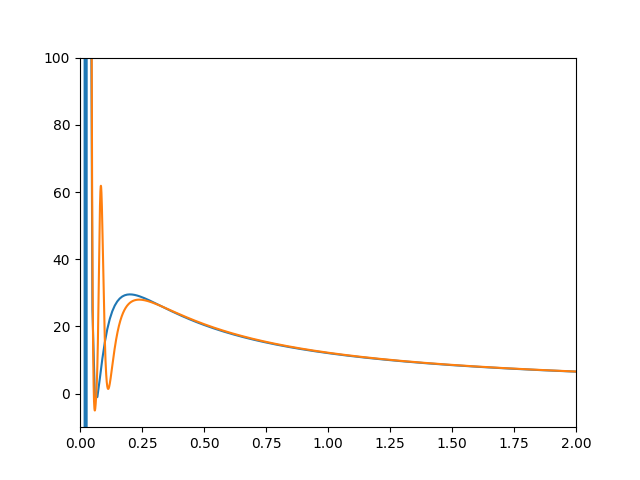

170.0

In [4]:
%matplotlib widget
plt.gcf().clf()

plt.plot(vs[::100], ps)
plt.plot(methane_isot["v"], methane_isot["pressure"]/1e5)

plt.xlim(0, 2)
plt.ylim(-10, 100)
plt.show()

t

In [22]:
v, it = methane.volume(z, 20, t, root="gas")
v, methane.pressure(z, v, t)

1 0.38862656996339545 14.795385657956698 -0.19438828101830233
2 0.46115717480729035 23.848118543420938 0.036265302421947435
3 0.5018512727669604 21.53775692792876 0.020347048979835
4 0.513977969180139 20.3874450953267 0.0060633482065893226
5 0.5160860214092311 20.06423361482924 0.0010540261145460027
6 0.5163816635525361 20.008935481599305 0.00014782107165249898
7 0.5164214471265128 20.001201051390133 1.9891786988370068e-05
8 0.516426769144357 20.000160645176358 2.6610089221052383e-06
9 0.5164274805262052 20.00002147263077 3.556909241124135e-07
10 0.5164275756048362 20.00000286988311 4.753931546176533e-08
11 0.5164275883122411 20.000000383564142 6.353702472740936e-09
12 0.5164275900106021 20.00000005126384 8.491805233769695e-10
13 0.5164275902375901 20.000000006851472 1.134939739563408e-10
14 0.5164275902679273 20.000000000915705 1.516856198636878e-11


(Array(0.51642759, dtype=float64), Array(20., dtype=float64))

In [23]:
components = ["methane", "ethane"]
tc, pc, w = [], [], []
for component in components:
    data = chemicals.CAS_from_any(component)
    tc.append(chemicals.critical.Tc(data))
    pc.append(chemicals.critical.Pc(data))
    w.append(chemicals.acentric.omega(data))


kij = np.array([
    [0, 0],
    [0, 0],
], dtype=float64)

lij = 0 * 1.5*kij

z = np.array([0.3, 0.7], dtype=float64)
p = 2.0
v = 100.0
t = 160.0

tc = np.array(tc, dtype=float64)
pc = np.array(pc, dtype=float64)/1e5
w = np.array(w, dtype=float64)

# Setup Mixing Rule
mixrule = pff.models.mixingrules.ClassicVdW(kij, lij)

# Setup the PR76 model
armodel = pff.models.cubic.PR76(tc, pc, w, mixrule)

# Setup the whole thermodyanmic system
system = pff.models.system.System(armodel=armodel)

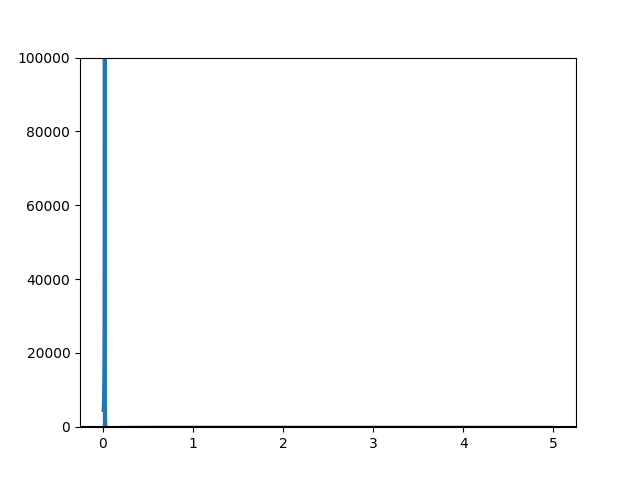

findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'Comic Sans' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfont: Font family 'TeX Gyre' not found.
findfo

ValueError: 
\text{asd}
^
Unknown symbol: \text, found '\'  (at char 0), (line:1, col:1)

In [ ]:
%matplotlib widget
pobj = 2
vs = np.linspace(0, 5, 10000)
ps = [system.pressure(z, v, t) for v in vs]

plt.plot(vs, ps)
plt.ylim(-1e2, 1e5)

plt.axvline(0.037898277402960964)
plt.axhline(pobj, color="black")
plt.show()

In [151]:
%%timeit
ps = np.linspace(1, 10, 100)

# v_gs = []
# v_ls = []

z = np.array([0.7, 0.3])

for pobj in ps:
    vg, it = system.volume(z, pobj, t)
    vl, it = system.volume(z, pobj, t, root="liquid")

    v_gs.append(vg)
    v_ls.append(vl)

2.21 s ± 81.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


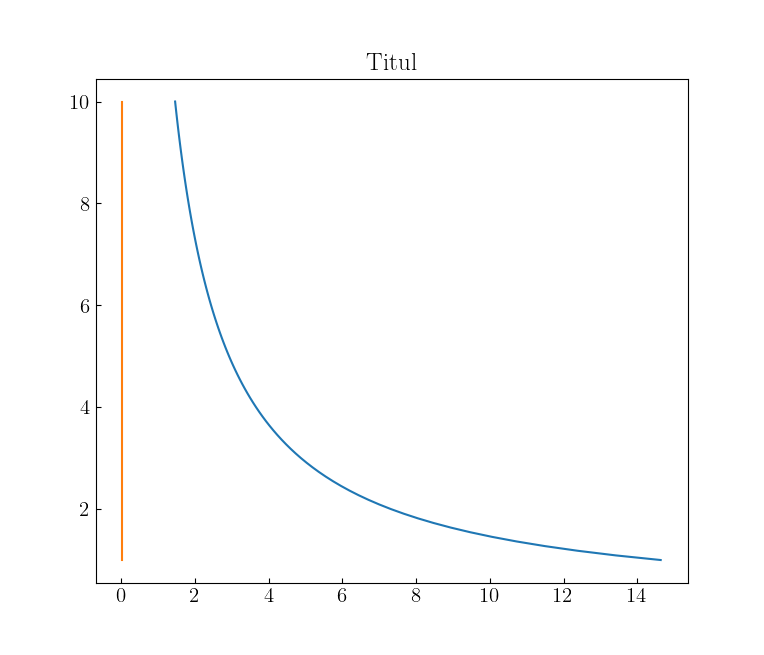

In [176]:
plt.clf()
plt.title("Titul")
plt.plot(v_gs, ps)
plt.plot(v_ls, ps)

plt.show()